In [1]:
# probably required functions
%matplotlib inline

import numpy as np
from numpy.lib.recfunctions import append_fields
import matplotlib
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import halotools.mock_observables as mo
import halotools.sim_manager as sm


In [2]:
# let us run a single bias as a test. First the data read
# we want to run this as three different mass cuts for now, focused around our best fit deltas. We can add
# more later if so desired

# three simulation box sizes
lbox1 = 125.0
lbox2 = 250.0
lbox3 = 500.0

# bias arrays for each value of delta studied
bias_l0125_d200 = np.zeros(4)
bias_l0125_d100 = np.zeros(4)
bias_l0125_d75  = np.zeros(4)
bias_l0125_d50 = np.zeros(4)
bias_l0125_d10 = np.zeros(4)
err_l0125_d200 = np.zeros((2,4))
err_l0125_d100 = np.zeros((2,4))
err_l0125_d75  = np.zeros((2,4))
err_l0125_d50 = np.zeros((2,4))
err_l0125_d10 = np.zeros((2,4))

bias_l0250_d200 = np.zeros(4)
bias_l0250_d100 = np.zeros(4)
bias_l0250_d75  = np.zeros(4)
bias_l0250_d50 = np.zeros(4)
err_l0250_d200 = np.zeros((2,4))
err_l0250_d100 = np.zeros((2,4))
err_l0250_d75  = np.zeros((2,4))
err_l0250_d50 = np.zeros((2,4))

bias_l0500_d340 = np.zeros(4)
bias_l0500_d200 = np.zeros(4)
bias_l0500_d100 = np.zeros(4)
bias_l0500_d75  = np.zeros(4)
bias_l0500_d50 = np.zeros(4)
err_l0500_d340 = np.zeros((2,4))
err_l0500_d200 = np.zeros((2,4))
err_l0500_d100 = np.zeros((2,4))
err_l0500_d75  = np.zeros((2,4))
err_l0500_d50 = np.zeros((2,4))

mass_l0125 = np.zeros(4)
mass_l0250 = np.zeros(4)
mass_l0500 = np.zeros(4)

# six mass cuts, designed to cover over the entire span of interest
mlow1 = 7e10
mhigh1 = 2e11
mass_l0125[0] = (np.log10(mhigh1)+np.log10(mlow1))/2.

mlow2 = 2e11
mhigh2 = 7e11
mass_l0125[1] = (np.log10(mhigh2)+np.log10(mlow2))/2.

mlow3 = 7e11
mhigh3 = 2e12
mass_l0125[2] = (np.log10(mhigh3)+np.log10(mlow3))/2.
mass_l0250[0] = mass_l0125[2]

mlow4 = 2e12
mhigh4 = 7e12
mass_l0125[3] = (np.log10(mhigh4)+np.log10(mlow4))/2.
mass_l0250[1] = mass_l0125[3]
mass_l0500[0] = mass_l0125[3]

mlow5 = 7e12
mhigh5 = 2e13
mass_l0250[2] = (np.log10(mhigh5)+np.log10(mlow5))/2.
mass_l0500[1] = mass_l0250[2]

mlow6 = 2e13
mhigh6 = 7e13
mass_l0250[3] = (np.log10(mhigh6)+np.log10(mlow6))/2.
mass_l0500[2] = mass_l0250[3]

mlow7 = 7e13
mhigh7 = 2e14
mass_l0500[3] = (np.log10(mhigh7)+np.log10(mlow7))/2.

rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

# first we read in the l0125 catalogs

fname = './l0125_d200b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m1)))
high_l0125_d200_data_m1 = l0125_d200_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m2)))
high_l0125_d200_data_m2 = l0125_d200_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m3)))
high_l0125_d200_data_m3 = l0125_d200_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d200_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d200_data_m4)))
high_l0125_d200_data_m4 = l0125_d200_data_m4[highlim:-1]

fname = './l0125_d100b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m1)))
high_l0125_d100_data_m1 = l0125_d100_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m2)))
high_l0125_d100_data_m2 = l0125_d100_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m3)))
high_l0125_d100_data_m3 = l0125_d100_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d100_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d100_data_m4)))
high_l0125_d100_data_m4 = l0125_d100_data_m4[highlim:-1]

fname = './l0125_d75b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m1)))
high_l0125_d75_data_m1 = l0125_d75_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m2)))
high_l0125_d75_data_m2 = l0125_d75_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m3)))
high_l0125_d75_data_m3 = l0125_d75_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d75_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d75_data_m4)))
high_l0125_d75_data_m4 = l0125_d75_data_m4[highlim:-1]

fname = './l0125_d50b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m1)))
high_l0125_d50_data_m1 = l0125_d50_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m2)))
high_l0125_d50_data_m2 = l0125_d50_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m3)))
high_l0125_d50_data_m3 = l0125_d50_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d50_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d50_data_m4)))
high_l0125_d50_data_m4 = l0125_d50_data_m4[highlim:-1]

fname = './l0125_d10b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow1},
                               row_cut_max_dict={'halo_mass':mhigh1}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m1 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m1)))
high_l0125_d10_data_m1 = l0125_d10_data_m1[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow2},
                               row_cut_max_dict={'halo_mass':mhigh2}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m2 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m2)))
high_l0125_d10_data_m2 = l0125_d10_data_m2[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m3)))
high_l0125_d10_data_m3 = l0125_d10_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0125_d10_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0125_d10_data_m4)))
high_l0125_d10_data_m4 = l0125_d10_data_m4[highlim:-1]

######################################
# then we read in the l0250 catalogs #
######################################

fname = './l0250_d200b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m3)))
high_l0250_d200_data_m3 = l0250_d200_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m4)))
high_l0250_d200_data_m4 = l0250_d200_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m5)))
high_l0250_d200_data_m5 = l0250_d200_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d200_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d200_data_m6)))
high_l0250_d200_data_m6 = l0250_d200_data_m6[highlim:-1]

fname = './l0250_d100b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m3)))
high_l0250_d100_data_m3 = l0250_d100_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m4)))
high_l0250_d100_data_m4 = l0250_d100_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m5)))
high_l0250_d100_data_m5 = l0250_d100_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d100_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d100_data_m6)))
high_l0250_d100_data_m6 = l0250_d100_data_m6[highlim:-1]

fname = './l0250_d75b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m3)))
high_l0250_d75_data_m3 = l0250_d75_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m4)))
high_l0250_d75_data_m4 = l0250_d75_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m5)))
high_l0250_d75_data_m5 = l0250_d75_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d75_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d75_data_m6)))
high_l0250_d75_data_m6 = l0250_d75_data_m6[highlim:-1]

fname = './l0250_d50b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow3},
                               row_cut_max_dict={'halo_mass':mhigh3}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m3 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m3)))
high_l0250_d50_data_m3 = l0250_d50_data_m3[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m4)))
high_l0250_d50_data_m4 = l0250_d50_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m5)))
high_l0250_d50_data_m5 = l0250_d50_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0250_d50_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0250_d50_data_m6)))
high_l0250_d50_data_m6 = l0250_d50_data_m6[highlim:-1]

# first we read in the l0500 catalogs

fname = './l0500_d340b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d340_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d340_data_m4)))
high_l0500_d340_data_m4 = l0500_d340_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d340_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d340_data_m5)))
high_l0500_d340_data_m5 = l0500_d340_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d340_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d340_data_m6)))
high_l0500_d340_data_m6 = l0500_d340_data_m6[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow7},
                               row_cut_max_dict={'halo_mass':mhigh7}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d340_data_m7 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d340_data_m7)))
high_l0500_d340_data_m7 = l0500_d340_data_m7[highlim:-1]

fname = './l0500_d200b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d200_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d200_data_m4)))
high_l0500_d200_data_m4 = l0500_d200_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d200_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d200_data_m5)))
high_l0500_d200_data_m5 = l0500_d200_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d200_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d200_data_m6)))
high_l0500_d200_data_m6 = l0500_d200_data_m6[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow7},
                               row_cut_max_dict={'halo_mass':mhigh7}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d200_data_m7 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d200_data_m7)))
high_l0500_d200_data_m7 = l0500_d200_data_m7[highlim:-1]

fname = './l0500_d100b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d100_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d100_data_m4)))
high_l0500_d100_data_m4 = l0500_d100_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d100_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d100_data_m5)))
high_l0500_d100_data_m5 = l0500_d100_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d100_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d100_data_m6)))
high_l0500_d100_data_m6 = l0500_d100_data_m6[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow7},
                               row_cut_max_dict={'halo_mass':mhigh7}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d100_data_m7 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d100_data_m7)))
high_l0500_d100_data_m7 = l0500_d100_data_m7[highlim:-1]

fname = './l0500_d75b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d75_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d75_data_m4)))
high_l0500_d75_data_m4 = l0500_d75_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d75_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d75_data_m5)))
high_l0500_d75_data_m5 = l0500_d75_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d75_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d75_data_m6)))
high_l0500_d75_data_m6 = l0500_d75_data_m6[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow7},
                               row_cut_max_dict={'halo_mass':mhigh7}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d75_data_m7 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d75_data_m7)))
high_l0500_d75_data_m7 = l0500_d75_data_m7[highlim:-1]

fname = './l0500_d50b.catalog' # file name to z0.0.catalog

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow4},
                               row_cut_max_dict={'halo_mass':mhigh4}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d50_data_m4 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d50_data_m4)))
high_l0500_d50_data_m4 = l0500_d50_data_m4[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow5},
                               row_cut_max_dict={'halo_mass':mhigh5}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d50_data_m5 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d50_data_m5)))
high_l0500_d50_data_m5 = l0500_d50_data_m5[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow6},
                               row_cut_max_dict={'halo_mass':mhigh6}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d50_data_m6 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d50_data_m6)))
high_l0500_d50_data_m6 = l0500_d50_data_m6[highlim:-1]

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mlow7},
                               row_cut_max_dict={'halo_mass':mhigh7}, row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = temp['halo_rvir']/temp['halo_rs']
temp2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))
l0500_d50_data_m7 = np.sort(temp2, order='halo_cNFW')
highlim=int(np.floor(.8*len(l0500_d50_data_m7)))
high_l0500_d50_data_m7 = l0500_d50_data_m7[highlim:-1]


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 17.17 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 15.08 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 15.11 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... workin

In [3]:
minlog = np.log10(5.0) #was previously set to 2.0, trying to avoid binning issue
maxlog = np.log10(15.0)
logbins = np.zeros(2)
logbins[0]=minlog
logbins[1]=maxlog

nrand = 200
rbias = np.zeros(nrand)

######################################
## First Calculate all L0125 Biases ##
######################################

# first calculate the bias
pos = np.vstack((l0125_d200_data_m1['halo_x'], l0125_d200_data_m1['halo_y'], l0125_d200_data_m1['halo_z'])).T
hipos = np.vstack((high_l0125_d200_data_m1['halo_x'], high_l0125_d200_data_m1['halo_y'], 
                 high_l0125_d200_data_m1['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d200[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi

err_l0125_d200[0,0] = (highxi/xi) - np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d200[1,0] = np.percentile(rbias, 84, interpolation='nearest') - (highxi/xi)

# repeat for remaining dataset
pos = np.vstack((l0125_d200_data_m2['halo_x'], l0125_d200_data_m2['halo_y'], l0125_d200_data_m2['halo_z'])).T
hipos = np.vstack((high_l0125_d200_data_m2['halo_x'], high_l0125_d200_data_m2['halo_y'], 
                 high_l0125_d200_data_m2['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d200[1] = highxi / xi

for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi

err_l0125_d200[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d200[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)

pos = np.vstack((l0125_d200_data_m3['halo_x'], l0125_d200_data_m3['halo_y'], l0125_d200_data_m3['halo_z'])).T
hipos = np.vstack((high_l0125_d200_data_m3['halo_x'], high_l0125_d200_data_m3['halo_y'], 
                 high_l0125_d200_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d200[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi

err_l0125_d200[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d200[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)

pos = np.vstack((l0125_d200_data_m4['halo_x'], l0125_d200_data_m4['halo_y'], l0125_d200_data_m4['halo_z'])).T
hipos = np.vstack((high_l0125_d200_data_m4['halo_x'], high_l0125_d200_data_m4['halo_y'], 
                 high_l0125_d200_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d200[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi

err_l0125_d200[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d200[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)

# first calculate the bias
pos = np.vstack((l0125_d100_data_m1['halo_x'], l0125_d100_data_m1['halo_y'], l0125_d100_data_m1['halo_z'])).T
hipos = np.vstack((high_l0125_d100_data_m1['halo_x'], high_l0125_d100_data_m1['halo_y'],
                 high_l0125_d100_data_m1['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d100[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d100[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d100[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


# repeat for remaining dataset
pos = np.vstack((l0125_d100_data_m2['halo_x'], l0125_d100_data_m2['halo_y'], l0125_d100_data_m2['halo_z'])).T
hipos = np.vstack((high_l0125_d100_data_m2['halo_x'], high_l0125_d100_data_m2['halo_y'],
                 high_l0125_d100_data_m2['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d100[1] = highxi / xi


for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d100[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d100[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d100_data_m3['halo_x'], l0125_d100_data_m3['halo_y'], l0125_d100_data_m3['halo_z'])).T
hipos = np.vstack((high_l0125_d100_data_m3['halo_x'], high_l0125_d100_data_m3['halo_y'],
                 high_l0125_d100_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d100[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d100[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d100[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d100_data_m4['halo_x'], l0125_d100_data_m4['halo_y'], l0125_d100_data_m4['halo_z'])).T
hipos = np.vstack((high_l0125_d100_data_m4['halo_x'], high_l0125_d100_data_m4['halo_y'],
                 high_l0125_d100_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d100[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d100[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d100[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)

# first calculate the bias
pos = np.vstack((l0125_d75_data_m1['halo_x'], l0125_d75_data_m1['halo_y'], l0125_d75_data_m1['halo_z'])).T
hipos = np.vstack((high_l0125_d75_data_m1['halo_x'], high_l0125_d75_data_m1['halo_y'],
                 high_l0125_d75_data_m1['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d75[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d75[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d75[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


# repeat for remaining dataset
pos = np.vstack((l0125_d75_data_m2['halo_x'], l0125_d75_data_m2['halo_y'], l0125_d75_data_m2['halo_z'])).T
hipos = np.vstack((high_l0125_d75_data_m2['halo_x'], high_l0125_d75_data_m2['halo_y'],
                 high_l0125_d75_data_m2['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d75[1] = highxi / xi


for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d75[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d75[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d75_data_m3['halo_x'], l0125_d75_data_m3['halo_y'], l0125_d75_data_m3['halo_z'])).T
hipos = np.vstack((high_l0125_d75_data_m3['halo_x'], high_l0125_d75_data_m3['halo_y'],
                 high_l0125_d75_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d75[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d75[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d75[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d75_data_m4['halo_x'], l0125_d75_data_m4['halo_y'], l0125_d75_data_m4['halo_z'])).T
hipos = np.vstack((high_l0125_d75_data_m4['halo_x'], high_l0125_d75_data_m4['halo_y'],
                 high_l0125_d75_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d75[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d75[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d75[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)

# first calculate the bias
pos = np.vstack((l0125_d50_data_m1['halo_x'], l0125_d50_data_m1['halo_y'], l0125_d50_data_m1['halo_z'])).T
hipos = np.vstack((high_l0125_d50_data_m1['halo_x'], high_l0125_d50_data_m1['halo_y'],
                 high_l0125_d50_data_m1['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d50[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d50[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d50[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


# repeat for remaining dataset
pos = np.vstack((l0125_d50_data_m2['halo_x'], l0125_d50_data_m2['halo_y'], l0125_d50_data_m2['halo_z'])).T
hipos = np.vstack((high_l0125_d50_data_m2['halo_x'], high_l0125_d50_data_m2['halo_y'],
                 high_l0125_d50_data_m2['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d50[1] = highxi / xi


for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d50[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d50[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d50_data_m3['halo_x'], l0125_d50_data_m3['halo_y'], l0125_d50_data_m3['halo_z'])).T
hipos = np.vstack((high_l0125_d50_data_m3['halo_x'], high_l0125_d50_data_m3['halo_y'],
                 high_l0125_d50_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d50[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d50[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d50[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d50_data_m4['halo_x'], l0125_d50_data_m4['halo_y'], l0125_d50_data_m4['halo_z'])).T
hipos = np.vstack((high_l0125_d50_data_m4['halo_x'], high_l0125_d50_data_m4['halo_y'],
                 high_l0125_d50_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d50[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d50[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d50[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)

# first calculate the bias
pos = np.vstack((l0125_d10_data_m1['halo_x'], l0125_d10_data_m1['halo_y'], l0125_d10_data_m1['halo_z'])).T
hipos = np.vstack((high_l0125_d10_data_m1['halo_x'], high_l0125_d10_data_m1['halo_y'],
                 high_l0125_d10_data_m1['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d10[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d10[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d10[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


# repeat for remaining dataset
pos = np.vstack((l0125_d10_data_m2['halo_x'], l0125_d10_data_m2['halo_y'], l0125_d10_data_m2['halo_z'])).T
hipos = np.vstack((high_l0125_d10_data_m2['halo_x'], high_l0125_d10_data_m2['halo_y'],
                 high_l0125_d10_data_m2['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d10[1] = highxi / xi


for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d10[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d10[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d10_data_m3['halo_x'], l0125_d10_data_m3['halo_y'], l0125_d10_data_m3['halo_z'])).T
hipos = np.vstack((high_l0125_d10_data_m3['halo_x'], high_l0125_d10_data_m3['halo_y'],
                 high_l0125_d10_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d10[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d10[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d10[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


pos = np.vstack((l0125_d10_data_m4['halo_x'], l0125_d10_data_m4['halo_y'], l0125_d10_data_m4['halo_z'])).T
hipos = np.vstack((high_l0125_d10_data_m4['halo_x'], high_l0125_d10_data_m4['halo_y'],
                 high_l0125_d10_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox1, 10*len(pos))
yran = np.random.uniform(0, lbox1, 10*len(pos))
zran = np.random.uniform(0, lbox1, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
bias_l0125_d10[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox1, num_threads='max')
    rbias[i] = highxi / rxi


err_l0125_d10[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0125_d10[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)


In [4]:
######################################
## Next Calculate all l0250 Biases ##
######################################




# first calculate the bias
pos = np.vstack((l0250_d200_data_m3['halo_x'], l0250_d200_data_m3['halo_y'], l0250_d200_data_m3['halo_z'])).T
hipos = np.vstack((high_l0250_d200_data_m3['halo_x'], high_l0250_d200_data_m3['halo_y'],
                 high_l0250_d200_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d200[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi




err_l0250_d200[0,0] = (highxi/xi) - np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d200[1,0] = np.percentile(rbias, 84, interpolation='nearest') - (highxi/xi)




# repeat for remaining dataset
pos = np.vstack((l0250_d200_data_m4['halo_x'], l0250_d200_data_m4['halo_y'], l0250_d200_data_m4['halo_z'])).T
hipos = np.vstack((high_l0250_d200_data_m4['halo_x'], high_l0250_d200_data_m4['halo_y'],
                 high_l0250_d200_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d200[1] = highxi / xi




for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi




err_l0250_d200[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d200[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




pos = np.vstack((l0250_d200_data_m5['halo_x'], l0250_d200_data_m5['halo_y'], l0250_d200_data_m5['halo_z'])).T
hipos = np.vstack((high_l0250_d200_data_m5['halo_x'], high_l0250_d200_data_m5['halo_y'],
                 high_l0250_d200_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d200[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi




err_l0250_d200[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d200[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




pos = np.vstack((l0250_d200_data_m6['halo_x'], l0250_d200_data_m6['halo_y'], l0250_d200_data_m6['halo_z'])).T
hipos = np.vstack((high_l0250_d200_data_m6['halo_x'], high_l0250_d200_data_m6['halo_y'],
                 high_l0250_d200_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d200[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi




err_l0250_d200[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d200[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




# first calculate the bias
pos = np.vstack((l0250_d100_data_m3['halo_x'], l0250_d100_data_m3['halo_y'], l0250_d100_data_m3['halo_z'])).T
hipos = np.vstack((high_l0250_d100_data_m3['halo_x'], high_l0250_d100_data_m3['halo_y'],
                 high_l0250_d100_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d100[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d100[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d100[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








# repeat for remaining dataset
pos = np.vstack((l0250_d100_data_m4['halo_x'], l0250_d100_data_m4['halo_y'], l0250_d100_data_m4['halo_z'])).T
hipos = np.vstack((high_l0250_d100_data_m4['halo_x'], high_l0250_d100_data_m4['halo_y'],
                 high_l0250_d100_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d100[1] = highxi / xi








for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d100[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d100[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0250_d100_data_m5['halo_x'], l0250_d100_data_m5['halo_y'], l0250_d100_data_m5['halo_z'])).T
hipos = np.vstack((high_l0250_d100_data_m5['halo_x'], high_l0250_d100_data_m5['halo_y'],
                 high_l0250_d100_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d100[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d100[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d100[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0250_d100_data_m6['halo_x'], l0250_d100_data_m6['halo_y'], l0250_d100_data_m6['halo_z'])).T
hipos = np.vstack((high_l0250_d100_data_m6['halo_x'], high_l0250_d100_data_m6['halo_y'],
                 high_l0250_d100_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d100[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d100[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d100[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




# first calculate the bias
pos = np.vstack((l0250_d75_data_m3['halo_x'], l0250_d75_data_m3['halo_y'], l0250_d75_data_m3['halo_z'])).T
hipos = np.vstack((high_l0250_d75_data_m3['halo_x'], high_l0250_d75_data_m3['halo_y'],
                 high_l0250_d75_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d75[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d75[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d75[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








# repeat for remaining dataset
pos = np.vstack((l0250_d75_data_m4['halo_x'], l0250_d75_data_m4['halo_y'], l0250_d75_data_m4['halo_z'])).T
hipos = np.vstack((high_l0250_d75_data_m4['halo_x'], high_l0250_d75_data_m4['halo_y'],
                 high_l0250_d75_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d75[1] = highxi / xi








for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d75[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d75[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0250_d75_data_m5['halo_x'], l0250_d75_data_m5['halo_y'], l0250_d75_data_m5['halo_z'])).T
hipos = np.vstack((high_l0250_d75_data_m5['halo_x'], high_l0250_d75_data_m5['halo_y'],
                 high_l0250_d75_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d75[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d75[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d75[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0250_d75_data_m6['halo_x'], l0250_d75_data_m6['halo_y'], l0250_d75_data_m6['halo_z'])).T
hipos = np.vstack((high_l0250_d75_data_m6['halo_x'], high_l0250_d75_data_m6['halo_y'],
                 high_l0250_d75_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d75[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d75[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d75[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




# first calculate the bias
pos = np.vstack((l0250_d50_data_m3['halo_x'], l0250_d50_data_m3['halo_y'], l0250_d50_data_m3['halo_z'])).T
hipos = np.vstack((high_l0250_d50_data_m3['halo_x'], high_l0250_d50_data_m3['halo_y'],
                 high_l0250_d50_data_m3['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d50[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d50[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d50[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








# repeat for remaining dataset
pos = np.vstack((l0250_d50_data_m4['halo_x'], l0250_d50_data_m4['halo_y'], l0250_d50_data_m4['halo_z'])).T
hipos = np.vstack((high_l0250_d50_data_m4['halo_x'], high_l0250_d50_data_m4['halo_y'],
                 high_l0250_d50_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d50[1] = highxi / xi








for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d50[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d50[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0250_d50_data_m5['halo_x'], l0250_d50_data_m5['halo_y'], l0250_d50_data_m5['halo_z'])).T
hipos = np.vstack((high_l0250_d50_data_m5['halo_x'], high_l0250_d50_data_m5['halo_y'],
                 high_l0250_d50_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d50[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d50[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d50[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0250_d50_data_m6['halo_x'], l0250_d50_data_m6['halo_y'], l0250_d50_data_m6['halo_z'])).T
hipos = np.vstack((high_l0250_d50_data_m6['halo_x'], high_l0250_d50_data_m6['halo_y'],
                 high_l0250_d50_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox2, 10*len(pos))
yran = np.random.uniform(0, lbox2, 10*len(pos))
zran = np.random.uniform(0, lbox2, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
bias_l0250_d50[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox2, num_threads='max')
    rbias[i] = highxi / rxi








err_l0250_d50[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0250_d50[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)






In [5]:
######################################
## Next Calculate all l0500 Biases ##
######################################


# first calculate the bias
pos = np.vstack((l0500_d340_data_m4['halo_x'], l0500_d340_data_m4['halo_y'], l0500_d340_data_m4['halo_z'])).T
hipos = np.vstack((high_l0500_d340_data_m4['halo_x'], high_l0500_d340_data_m4['halo_y'],
                 high_l0500_d340_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d340[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d340[0,0] = (highxi/xi) - np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d340[1,0] = np.percentile(rbias, 84, interpolation='nearest') - (highxi/xi)








# repeat for remaining dataset
pos = np.vstack((l0500_d340_data_m5['halo_x'], l0500_d340_data_m5['halo_y'], l0500_d340_data_m5['halo_z'])).T
hipos = np.vstack((high_l0500_d340_data_m5['halo_x'], high_l0500_d340_data_m5['halo_y'],
                 high_l0500_d340_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d340[1] = highxi / xi








for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d340[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d340[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d340_data_m6['halo_x'], l0500_d340_data_m6['halo_y'], l0500_d340_data_m6['halo_z'])).T
hipos = np.vstack((high_l0500_d340_data_m6['halo_x'], high_l0500_d340_data_m6['halo_y'],
                 high_l0500_d340_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d340[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d340[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d340[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d340_data_m7['halo_x'], l0500_d340_data_m7['halo_y'], l0500_d340_data_m7['halo_z'])).T
hipos = np.vstack((high_l0500_d340_data_m7['halo_x'], high_l0500_d340_data_m7['halo_y'],
                 high_l0500_d340_data_m7['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d340[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d340[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d340[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)














# first calculate the bias
pos = np.vstack((l0500_d200_data_m4['halo_x'], l0500_d200_data_m4['halo_y'], l0500_d200_data_m4['halo_z'])).T
hipos = np.vstack((high_l0500_d200_data_m4['halo_x'], high_l0500_d200_data_m4['halo_y'],
                 high_l0500_d200_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d200[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi




err_l0500_d200[0,0] = (highxi/xi) - np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d200[1,0] = np.percentile(rbias, 84, interpolation='nearest') - (highxi/xi)




# repeat for remaining dataset
pos = np.vstack((l0500_d200_data_m5['halo_x'], l0500_d200_data_m5['halo_y'], l0500_d200_data_m5['halo_z'])).T
hipos = np.vstack((high_l0500_d200_data_m5['halo_x'], high_l0500_d200_data_m5['halo_y'],
                 high_l0500_d200_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d200[1] = highxi / xi




for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi




err_l0500_d200[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d200[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




pos = np.vstack((l0500_d200_data_m6['halo_x'], l0500_d200_data_m6['halo_y'], l0500_d200_data_m6['halo_z'])).T
hipos = np.vstack((high_l0500_d200_data_m6['halo_x'], high_l0500_d200_data_m6['halo_y'],
                 high_l0500_d200_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d200[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi




err_l0500_d200[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d200[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




pos = np.vstack((l0500_d200_data_m7['halo_x'], l0500_d200_data_m7['halo_y'], l0500_d200_data_m7['halo_z'])).T
hipos = np.vstack((high_l0500_d200_data_m7['halo_x'], high_l0500_d200_data_m7['halo_y'],
                 high_l0500_d200_data_m7['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d200[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi




err_l0500_d200[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d200[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




# first calculate the bias
pos = np.vstack((l0500_d100_data_m4['halo_x'], l0500_d100_data_m4['halo_y'], l0500_d100_data_m4['halo_z'])).T
hipos = np.vstack((high_l0500_d100_data_m4['halo_x'], high_l0500_d100_data_m4['halo_y'],
                 high_l0500_d100_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d100[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d100[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d100[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








# repeat for remaining dataset
pos = np.vstack((l0500_d100_data_m5['halo_x'], l0500_d100_data_m5['halo_y'], l0500_d100_data_m5['halo_z'])).T
hipos = np.vstack((high_l0500_d100_data_m5['halo_x'], high_l0500_d100_data_m5['halo_y'],
                 high_l0500_d100_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d100[1] = highxi / xi








for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d100[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d100[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d100_data_m6['halo_x'], l0500_d100_data_m6['halo_y'], l0500_d100_data_m6['halo_z'])).T
hipos = np.vstack((high_l0500_d100_data_m6['halo_x'], high_l0500_d100_data_m6['halo_y'],
                 high_l0500_d100_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d100[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d100[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d100[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d100_data_m7['halo_x'], l0500_d100_data_m7['halo_y'], l0500_d100_data_m7['halo_z'])).T
hipos = np.vstack((high_l0500_d100_data_m7['halo_x'], high_l0500_d100_data_m7['halo_y'],
                 high_l0500_d100_data_m7['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d100[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d100[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d100[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




# first calculate the bias
pos = np.vstack((l0500_d75_data_m4['halo_x'], l0500_d75_data_m4['halo_y'], l0500_d75_data_m4['halo_z'])).T
hipos = np.vstack((high_l0500_d75_data_m4['halo_x'], high_l0500_d75_data_m4['halo_y'],
                 high_l0500_d75_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d75[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d75[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d75[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








# repeat for remaining dataset
pos = np.vstack((l0500_d75_data_m5['halo_x'], l0500_d75_data_m5['halo_y'], l0500_d75_data_m5['halo_z'])).T
hipos = np.vstack((high_l0500_d75_data_m5['halo_x'], high_l0500_d75_data_m5['halo_y'],
                 high_l0500_d75_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d75[1] = highxi / xi








for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d75[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d75[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d75_data_m6['halo_x'], l0500_d75_data_m6['halo_y'], l0500_d75_data_m6['halo_z'])).T
hipos = np.vstack((high_l0500_d75_data_m6['halo_x'], high_l0500_d75_data_m6['halo_y'],
                 high_l0500_d75_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d75[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d75[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d75[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d75_data_m7['halo_x'], l0500_d75_data_m7['halo_y'], l0500_d75_data_m7['halo_z'])).T
hipos = np.vstack((high_l0500_d75_data_m7['halo_x'], high_l0500_d75_data_m7['halo_y'],
                 high_l0500_d75_data_m7['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d75[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d75[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d75[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)




# first calculate the bias
pos = np.vstack((l0500_d50_data_m4['halo_x'], l0500_d50_data_m4['halo_y'], l0500_d50_data_m4['halo_z'])).T
hipos = np.vstack((high_l0500_d50_data_m4['halo_x'], high_l0500_d50_data_m4['halo_y'],
                 high_l0500_d50_data_m4['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d50[0] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d50[0,0] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d50[1,0] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








# repeat for remaining dataset
pos = np.vstack((l0500_d50_data_m5['halo_x'], l0500_d50_data_m5['halo_y'], l0500_d50_data_m5['halo_z'])).T
hipos = np.vstack((high_l0500_d50_data_m5['halo_x'], high_l0500_d50_data_m5['halo_y'],
                 high_l0500_d50_data_m5['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d50[1] = highxi / xi








for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d50[0,1] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d50[1,1] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d50_data_m6['halo_x'], l0500_d50_data_m6['halo_y'], l0500_d50_data_m6['halo_z'])).T
hipos = np.vstack((high_l0500_d50_data_m6['halo_x'], high_l0500_d50_data_m6['halo_y'],
                 high_l0500_d50_data_m6['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d50[2] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d50[0,2] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d50[1,2] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








pos = np.vstack((l0500_d50_data_m7['halo_x'], l0500_d50_data_m7['halo_y'], l0500_d50_data_m7['halo_z'])).T
hipos = np.vstack((high_l0500_d50_data_m7['halo_x'], high_l0500_d50_data_m7['halo_y'],
                 high_l0500_d50_data_m7['halo_z'])).T
xran = np.random.uniform(0, lbox3, 10*len(pos))
yran = np.random.uniform(0, lbox3, 10*len(pos))
zran = np.random.uniform(0, lbox3, 10*len(pos))
randoms = np.vstack((xran, yran, zran)).T
xi = mo.tpcf(pos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
highxi = mo.tpcf(hipos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
bias_l0500_d50[3] = highxi / xi
# then calculate the error via randomizations
for i in range(0, nrand):
    ridx = np.random.choice(len(pos), len(hipos), replace=False)
    rpos = pos[ridx]
    rxi = mo.tpcf(rpos, 10**logbins, randoms=randoms, period=lbox3, num_threads='max')
    rbias[i] = highxi / rxi








err_l0500_d50[0,3] = (highxi/xi)-np.percentile(rbias, 16, interpolation='nearest')
err_l0500_d50[1,3] = np.percentile(rbias, 84, interpolation='nearest')-(highxi/xi)








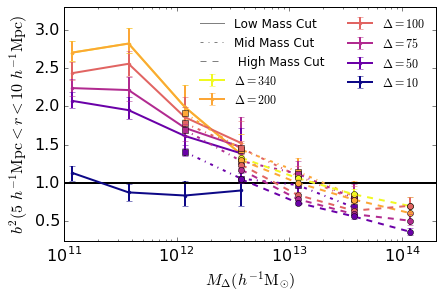

In [22]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

colord340 = cm.plasma(1.)
colord200 = cm.plasma(0.8)
colord100 = cm.plasma(0.6)
colord75 = cm.plasma(0.40)
colord50 = cm.plasma(0.2)
colord10 = cm.plasma(0.0)

plt.axhline(y=1.0, color='k', linewidth=2)

plt.semilogx(10**mass_l0125[0], bias_l0125_d200[0])
plt.errorbar(10**mass_l0125, bias_l0125_d200, yerr=err_l0125_d200, 
             color=colord340, linestyle='-', linewidth=2, marker='.', ms=6, label=r'$\Delta = 340$')
plt.errorbar(10**mass_l0125, bias_l0125_d200, yerr=err_l0125_d200, 
             color=colord200, linestyle='-', linewidth=2, marker='.', ms=6, label=r'$\Delta = 200$')
plt.errorbar(10**mass_l0125, bias_l0125_d100, yerr=err_l0125_d100, 
             color=colord100, linestyle='-', linewidth=2, marker='.', ms=6, label=r'$\Delta = 100$')
plt.errorbar(10**mass_l0125, bias_l0125_d75, yerr=err_l0125_d75, 
             color=colord75, linestyle='-', linewidth=2, marker='.', ms=6, label=r'$\Delta = 75$')
plt.errorbar(10**mass_l0125, bias_l0125_d50, yerr=err_l0125_d50, 
             color=colord50, linestyle='-', linewidth=2, marker='.', ms=6, label=r'$\Delta = 50$')
plt.errorbar(10**mass_l0125, bias_l0125_d10, yerr=err_l0125_d10, 
             color=colord10, linestyle='-', linewidth=2, marker='.', ms=6, label=r'$\Delta = 10$')

plt.errorbar(10**mass_l0250, bias_l0250_d200, yerr=err_l0250_d200, 
             color=colord200, linestyle='-.', linewidth=2, marker='s', ms=6)
plt.errorbar(10**mass_l0250, bias_l0250_d100, yerr=err_l0250_d100, 
             color=colord100, linestyle='-.', linewidth=2, marker='s', ms=6)
plt.errorbar(10**mass_l0250, bias_l0250_d75, yerr=err_l0250_d75, 
             color=colord75, linestyle='-.', linewidth=2, marker='s', ms=6)
plt.errorbar(10**mass_l0250, bias_l0250_d50, yerr=err_l0250_d50, 
             color=colord50, linestyle='-.', linewidth=2, marker='s', ms=6)

plt.errorbar(10**mass_l0500, bias_l0500_d340, yerr=err_l0500_d340, 
             color=colord340, linestyle='--', linewidth=2, marker='o', ms=6)
plt.errorbar(10**mass_l0500, bias_l0500_d200, yerr=err_l0500_d200, 
             color=colord200, linestyle='--', linewidth=2, marker='o', ms=6)
plt.errorbar(10**mass_l0500, bias_l0500_d100, yerr=err_l0500_d100, 
             color=colord100, linestyle='--', linewidth=2, marker='o', ms=6)
plt.errorbar(10**mass_l0500, bias_l0500_d75, yerr=err_l0500_d75, 
             color=colord75, linestyle='--', linewidth=2, marker='o', ms=6)
plt.errorbar(10**mass_l0500, bias_l0500_d50, yerr=err_l0500_d50, 
             color=colord50, linestyle='--', linewidth=2, marker='o', ms=6)

plt.plot(0, 0, color='grey', linestyle='-', label=r'Low Mass Cut')
plt.plot(0, 0, color='grey', linestyle='-.', label=r'Mid Mass Cut')
plt.plot(0, 0, color='grey', linestyle='--', label=r' High Mass Cut')

plt.xlabel(r'$M_{\Delta} (h^{-1}\mathrm{M}_{\odot})$')
plt.ylabel(r'$b^2 (5 \ h^{-1}\mathrm{Mpc} < r < 10\  h^{-1}\mathrm{Mpc})$')
plt.xlim(10**11, 2*10**14)
plt.ylim(0.25, 3.3)
plt.legend(loc='upper right', numpoints=1, frameon=False, prop={'size':12}, ncol=2)

plt.tight_layout(pad=0.1)
plt.savefig('biasplot.pdf')

In [ ]:
ridx = np.random.choice(len(pos), len(hipos), replace=False)
rpos = pos[ridx]
pos[2], rpos[2]

In [16]:
print mass_l0125, mass_l0250, mass_l0500

[ 11.07306402  11.57306402  12.07306402  12.57306402] [ 12.07306402  12.57306402  13.07306402  13.57306402] [ 12.57306402  13.07306402  13.57306402  14.07306402]


In [ ]:
print testerr, highxi/xi